# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [ ]:
rs = 7

In [ ]:
data = pd.read_csv('/datasets/insurance.csv')

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [ ]:
columns_lst = data.columns

In [ ]:
def unique_val_of_col(data,columns):
    for i in columns_lst:
        print(f'В столбце {i} имеются такие уникальные значения в в соотвествующем кол-ве')
        print(data[i].unique())
        display(data[i].value_counts())
        print('-'*30)

In [ ]:
unique_val_of_col(data,columns_lst)

В столбце Пол имеются такие уникальные значения в в соотвествующем кол-ве
[1 0]


0    2505
1    2495
Name: Пол, dtype: int64

------------------------------
В столбце Возраст имеются такие уникальные значения в в соотвествующем кол-ве
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]


19.0    223
25.0    214
31.0    212
26.0    211
27.0    209
22.0    209
32.0    206
28.0    204
29.0    203
30.0    202
23.0    202
21.0    200
20.0    195
36.0    193
33.0    191
24.0    182
35.0    179
34.0    177
37.0    147
39.0    141
38.0    139
41.0    129
18.0    117
40.0    114
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
50.0     27
48.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
60.0      2
58.0      2
57.0      2
65.0      1
61.0      1
62.0      1
Name: Возраст, dtype: int64

------------------------------
В столбце Зарплата имеются такие уникальные значения в в соотвествующем кол-ве
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500. 51800.
 33800. 46400. 43200. 31800. 50200. 35100. 30700. 45800. 49300. 42800.
 33600. 50300. 34000. 36400. 44900. 43600. 54600. 52800. 29700. 39000.
 44100. 31900. 37700. 35200. 43100. 51

45800.0    29
37100.0    28
43200.0    27
41500.0    27
46800.0    26
           ..
14300.0     1
62600.0     1
7400.0      1
70000.0     1
15200.0     1
Name: Зарплата, Length: 524, dtype: int64

------------------------------
В столбце Члены семьи имеются такие уникальные значения в в соотвествующем кол-ве
[1 0 2 4 3 5 6]


1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

------------------------------
В столбце Страховые выплаты имеются такие уникальные значения в в соотвествующем кол-ве
[0 1 2 3 5 4]


0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

------------------------------


In [ ]:
data.duplicated().sum()

153

In [ ]:
data.shape[0]


5000

In [ ]:
(data.drop_duplicates()).shape[0]

4847

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

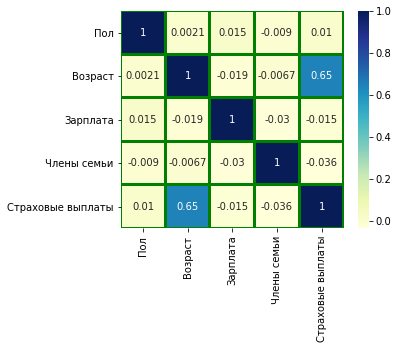

In [ ]:
figure(figsize=(5,4))

sns.heatmap(data.corr(),
            annot=True,
            cmap='YlGnBu',
            linewidth=2,
            linecolor='green')
plt.show()

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**
$$
a = XX^{-1}y
$$

**Обоснование:**

Используем свойства матричного умножения и операции транспонирования:
$$
1. AA^{-1}=E
$$
$$
2. (AB)^{T} = A^{T}B^{T}
$$
$$
3. (AB)^{-1} = A^{-1}B^{-1}
$$
Квадратные матрицы:
$$
1. X^{T}X
$$
$$
2. A
$$
$$
3. A^{T}
$$

$$
] X = XP =>
$$
$$
a_p = XP((XP)^{T}(XP))^{-1}(XP)^{T}y => XP(P^{T}(X^{T}X)P)^{-1}(P^{T}X^{T})y => XPP^{-1}(X^{T}X)^{-1}P^{-T}(P^{T}X^{T})y
=> X(X^{T}X)^{-1}X^{T}y
$$
Произведем замену
$
w = (X^{T}X)^{-1}X^{T}y=P^{-1}w
$

=>

$
w(y) = P^{-1}w
$

Подставим все в формулу a_p

$
a_p = X'w'=XPP^{-1}w=Xw=a
$

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.columns = ['gender','age','salary','family_members','insurance']

In [ ]:
features = data.drop('insurance',axis=1)
target = data['insurance']

In [ ]:
features_matrix = np.array(features)
target_matrix = np.array(target)
features_train,features_test,target_train,target_test = train_test_split(features_matrix,target_matrix,test_size=0.3,random_state=rs)

In [ ]:
lr = LinearRegression()
lr.fit(features_train,target_train)

LinearRegression()

In [ ]:
lr.predict(features_test)

array([ 0.51621641, -0.11079454, -0.00575859, ...,  0.30103413,
        0.09727962,  0.31681151])

In [ ]:
lr.score(features_test,target_test)

0.4142925818665243

In [ ]:
identity_matrix = np.identity(4)


In [ ]:
np.random.seed(7)
random_invertible = np.random.randint(low=1,high=10,size=(4,4))

In [ ]:
features_test.shape

(1500, 4)

In [ ]:
data

,gender,age,salary,family_members,insurance
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [ ]:
features = data.drop('insurance',axis=1)
target = data['insurance']

features_matrix = np.array(features)
target_matrix = np.array(target)


In [ ]:
features_train,features_test,target_train,target_test = train_test_split(features_matrix,target_matrix,test_size=0.3,random_state=rs)



### Модель признаки без изменения

In [ ]:
lr.fit(features_train,target_train)
lr.score(features_test,target_test)

0.4142925818665243

### Модель с признаками, умноженными на случайную обратимую матрицу

In [ ]:
features_after_mm =  features_matrix @ random_invertible


features_train,features_test,target_train,target_test = train_test_split(features_after_mm,target_matrix,test_size=0.3,random_state=rs)



In [ ]:
lr.fit(features_train,target_train)
lr.score(features_test,target_test)

0.41429258186661677

### Модель с признаками, умноженными на единичную матрицу

In [ ]:
features_after_imm = features_matrix @ identity_matrix
features_train,features_test,target_train,target_test = train_test_split(features_after_imm,target_matrix,test_size=0.3,random_state=rs)




In [ ]:
lr.fit(features_train,target_train)
lr.score(features_test,target_test)

0.4142925818665243

## Алгоритм преобразования

**Алгоритм**

Умножим на случайную обратимую матрицу признаки модели. Обоснование эквивалентности преобразования приведено выше


**Этапы и обоснование:**
1. Генерация случайной матрицы
2. Проверка матрицы на обратимость, умножим на случайную обратимую матрицу A
3. Получение матрицы преобразованных признаков
4. Обучение линейной регрессии на исходных и на зашифрованных данных
5. Сравнение получившихся метрик R2

In [ ]:
def random_invertible_matrix(low=1,high=10,size=(features.shape[1],features.shape[1])):
    global random_matrix
    try:
        random_matrix = np.random.randint(low=low,high=high,size=size)
        np.linalg.inv(random_matrix)
        return random_matrix
    except Exception:
        random_invertible_matrix()





In [ ]:
features_matrix = np.array(features)
target_matrix = np.array(target)




In [ ]:
features_after_mm =  features_matrix @ random_invertible_matrix()


In [ ]:
random_matrix

array([[7, 4, 6, 9],
       [9, 8, 6, 1],
       [1, 3, 9, 7],
       [5, 8, 4, 4]])

In [ ]:
features_train,features_test,target_train,target_test = train_test_split(features_matrix,target_matrix,test_size=0.3,random_state=rs)

## Проверка алгоритма

In [ ]:
lr.fit(features_train,target_train)
lr.score(features_test,target_test)

0.4142925818665243

**Вывод:**

R2_score линейной регрессии не меняется при умножении матрицы признаков на квадратную обратимую матрицу.

# Итоговый вывод

- Были загружены и изучены данные
- Разработан алгоритм который преобразует данные, работает он с помощью умножения матрицы признаков на кодирующую матрицу
- Протестирована метрика R2 для данных без преобразования и с ним, было замечено, что R2 не изменилось, алгоритм работает
- Данные легко зашифровать, умножив матрицу с данными на кодирующую